## Data Scientist / Machine Learning / Machine Learning in Python: Intermediate / Guided Project: Predicting the stock market

### 1: The Dataset

You'll be using historical data on the price of the S&P500 Index to make predictions about future prices. Predicting whether an index will go up or down will help us forecast how the stock market as a whole will perform. Since stocks tend to correlate with how well the economy as a whole is performing, it can also help us make economic forecasts.

There are also thousands of traders who make money by buying and selling Exchange Traded Funds. ETFs allow you to buy and sell indexes like stocks. This means that you could "buy" the S&P500 Index ETF when the price is low, and sell when it's high to make a profit. Creating a predictive model could allow traders to make money on the stock market.

In this mission, you'll be working with a csv file containing index prices. Each row in the file contains a daily record of the price of the S&P500 Index from `1950` to `2015`. The dataset was taken from here, and is stored in `sphist.csv`.

The columns of the dataset are:

`Date` -- The date of the record.
`Open` -- The opening price of the day (when trading starts).
`High` -- The highest trade price during the day.
`Low` -- The lowest trade price during the day.
`Close` -- The closing price for the day (when trading is finished).
`Volume` -- The number of shares traded.
`Adj Close` -- The daily closing price, adjusted retroactively to include any corporate actions. Read more [here](http://www.investopedia.com/terms/a/adjusted_closing_price.asp).
You'll be using this dataset to develop a predictive model. You'll train the model with data from `1950-2012`, and try to make predictions from `2013-2015`.

### 2: Reading In The Data
You'll need to read the data into Python, do some processing to set the right column types, and then sort the dataframe.
* Read the data into a Pandas DataFrame using the `read_csv` Pandas function.
* Convert the `Date` column to a Pandas date type using the `to_datetime` function in Pandas. This will allow date comparisons with the column.
* perform comparisons with `df["Date"] > datetime(year=2015, month=4, day=1)` to generate a Boolean series that tells you if each item in the `Date` column is after `2015-04-01`. You'll have to import the `datetime` module from the `datetime` library first with `from datetime import datetime`.
* Sort the dataframe on the `Date` column. It's currently in descending order, but we'll want it to be in ascending order for some of the next steps. You can use the `sort` method on Dataframes for this.

In [3]:
import pandas as pd
sphist = pd.read_csv("data/sp500/sphist.csv")

In [5]:
print(sphist.head())

         Date         Open         High          Low        Close  \
0  2017-05-12  2392.439941  2392.439941  2387.189941  2390.899902   
1  2017-05-11  2394.840088  2395.719971  2381.739990  2394.439941   
2  2017-05-10  2396.790039  2399.739990  2392.790039  2399.629883   
3  2017-05-09  2401.580078  2403.870117  2392.439941  2396.919922   
4  2017-05-08  2399.939941  2401.360107  2393.919922  2399.379883   

         Volume  Adjusted Close  
0  3.305630e+09     2390.899902  
1  3.727420e+09     2394.439941  
2  3.643530e+09     2399.629883  
3  3.653590e+09     2396.919922  
4  3.429440e+09     2399.379883  


In [6]:
print(sphist.info())
# The info() method is useful to get a quick description of the data, in particular the total number of rows, 
# and each attribute’s type and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16950 entries, 0 to 16949
Data columns (total 7 columns):
Date              16950 non-null object
Open              16950 non-null float64
High              16950 non-null float64
Low               16950 non-null float64
Close             16950 non-null float64
Volume            16950 non-null float64
Adjusted Close    16950 non-null float64
dtypes: float64(6), object(1)
memory usage: 927.0+ KB
None


In [7]:
print(sphist.describe())
# The describe() method shows a summary of the numerical attributes

               Open          High           Low         Close        Volume  \
count  16950.000000  16950.000000  16950.000000  16950.000000  1.695000e+04   
mean     518.068408    521.239196    514.729210    518.199521  8.580055e+08   
std      599.870601    603.163883    596.330102    600.006091  1.509149e+09   
min       16.660000     16.660000     16.660000     16.660000  6.800000e+05   
25%       84.790001     85.517502     84.184999     84.807503  8.310000e+06   
50%      159.495002    160.449997    158.610001    159.495002  8.182500e+07   
75%     1030.510040   1038.865020   1022.637496   1030.672485  9.854750e+08   
max     2401.580078   2403.870117   2393.919922   2399.629883  1.145623e+10   

       Adjusted Close  
count    16950.000000  
mean       518.199521  
std        600.006091  
min         16.660000  
25%         84.807503  
50%        159.495002  
75%       1030.672485  
max       2399.629883  


In [8]:
sphist["Date"] = pd.to_datetime(sphist["Date"])
print(sphist.info())
print(sphist.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16950 entries, 0 to 16949
Data columns (total 7 columns):
Date              16950 non-null datetime64[ns]
Open              16950 non-null float64
High              16950 non-null float64
Low               16950 non-null float64
Close             16950 non-null float64
Volume            16950 non-null float64
Adjusted Close    16950 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 927.0 KB
None
               Open          High           Low         Close        Volume  \
count  16950.000000  16950.000000  16950.000000  16950.000000  1.695000e+04   
mean     518.068408    521.239196    514.729210    518.199521  8.580055e+08   
std      599.870601    603.163883    596.330102    600.006091  1.509149e+09   
min       16.660000     16.660000     16.660000     16.660000  6.800000e+05   
25%       84.790001     85.517502     84.184999     84.807503  8.310000e+06   
50%      159.495002    160.449997    158.610001    159.495

In [9]:
print(sphist.head())

        Date         Open         High          Low        Close  \
0 2017-05-12  2392.439941  2392.439941  2387.189941  2390.899902   
1 2017-05-11  2394.840088  2395.719971  2381.739990  2394.439941   
2 2017-05-10  2396.790039  2399.739990  2392.790039  2399.629883   
3 2017-05-09  2401.580078  2403.870117  2392.439941  2396.919922   
4 2017-05-08  2399.939941  2401.360107  2393.919922  2399.379883   

         Volume  Adjusted Close  
0  3.305630e+09     2390.899902  
1  3.727420e+09     2394.439941  
2  3.643530e+09     2399.629883  
3  3.653590e+09     2396.919922  
4  3.429440e+09     2399.379883  


In [12]:
from datetime import datetime
#sphist["Date"] > datetime(year=2015, month=4, day=1)
sphist.sort_values("Date", ascending=True, inplace=True)
print(sphist.head())


            Date   Open   High    Low  Close     Volume  Adjusted Close
16949 1950-01-03  16.66  16.66  16.66  16.66  1260000.0           16.66
16948 1950-01-04  16.85  16.85  16.85  16.85  1890000.0           16.85
16947 1950-01-05  16.93  16.93  16.93  16.93  2550000.0           16.93
16946 1950-01-06  16.98  16.98  16.98  16.98  2010000.0           16.98
16945 1950-01-09  17.08  17.08  17.08  17.08  2520000.0           17.08


### 3: Generating Indicators
Datasets taken from the stock market need to be handled differently than datasets from other sectors when it comes time to make predictions. In a normal machine learning exercise, we treat each row as independent. Stock market data is **_sequential_**, and each observation comes a day after the previous observation. Thus, the observations are not all independent, and you can't treat them as such.

This means you have to be extra careful to not inject "future" knowledge into past rows when you do training and prediction. Injecting future knowledge will make our model look good when you're training and testing it, but will make it fail in the real world. This is how many algorithmic traders lose money.

The **_time series_** nature of the data means that can generate indicators to make our model more accurate. For instance, you can create a new column that contains the average price of the last 10 trades for each row. This will incorporate information from multiple prior rows into one, and will make predictions much more accurate.

When you do this, you have to be careful not to use the current row in the values you average. You want to teach the model how to predict the current price from historical prices. If you include the current price in the prices you average, it will be equivalent to handing the answers to the model upfront, and will make it impossible to use in the "real world", where you don't know the price upfront.

Here are some indicators that are interesting to generate for each row:

* The average price from the past `5` days.
* The average price for the past `30` days.
* The average price for the past `365` days.
* The ratio between the average price for the past `5` days, and the average price for the past `365` days.
* The standard deviation of the price over the past `5` days.
* The standard deviation of the price over the past `365` days.
* The ratio between the standard deviation for the past `5` days, and the standard deviation for the past `365` days.

"Days" means "trading days" -- so if you're computing the average of the past `5` days, it should be the `5` most recent dates before the current one. Assume that "price" means the `Close` column. Always be careful not to include the current price in these indicators! You're predicting the next day price, so our indicators are designed to predict the current price from the previous prices.

Some of these indicators require a year of historical data to compute. Our first day of data falls on `1950-01-03`, so the first day you can start computing indicators on is `1951-01-03`.

To compute indicators, you'll need to loop through each day from `1951-01-03` to `2015-12-07` (the last day you have prices for). For instance, if we were computing the average price from the past `5` days, we'd start at `1951-01-03`, get the prices for each day from `1950-12-26` to `1951-01-02`, and find the average. The reason why we start on the `26th`, and take more than `5` calendar days into account is because the stock market is shutdown on certain holidays. Since we're looking at the past `5` trading days, we need to look at more than `5` calendar days to find them. 

* Pick `3` indicators to compute, and generate a different column for each one.
  * The average price from the past `5` days.
  * The average price for the past `30` days.
  * The standard deviation of the price over the past `5` days.
  * The average price for the past 365 days.
* There are a few different ways to do this:
* You can use a for loop along with the `iterrows` method to loop over the rows in the DataFrame and compute the indicators. This is the recommended way, as it's a bit simpler to understand what's happening. Since you'll be looping over all of the rows, for any date that comes before there is enough historical data to compute an indicator, just fill in `0`.
* Pandas has some `time series tools` that can help, including the `rolling_mean` function, which will do most of the hard computation for you. Set the `window` equal to the number of trading days in the past you want to use to compute the indicators. This will add in `NaN` values for any row where there aren't enough historical trading days to do the computation. Note: There is a giant caveat here, which is that the rolling mean will use the current day's price. You'll need to reindex the resulting series to shift all the values "forward" one day. For example, the rolling mean calculated for `1950-01-03` will need to be assigned to `1950-01-04`, and so on. You can use the `shift` method on Dataframes to do this.

In [16]:
print(sphist.iloc[0:10][:])

            Date       Open       High        Low      Close     Volume  \
16949 1950-01-03  16.660000  16.660000  16.660000  16.660000  1260000.0   
16948 1950-01-04  16.850000  16.850000  16.850000  16.850000  1890000.0   
16947 1950-01-05  16.930000  16.930000  16.930000  16.930000  2550000.0   
16946 1950-01-06  16.980000  16.980000  16.980000  16.980000  2010000.0   
16945 1950-01-09  17.080000  17.080000  17.080000  17.080000  2520000.0   
16944 1950-01-10  17.030001  17.030001  17.030001  17.030001  2160000.0   
16943 1950-01-11  17.090000  17.090000  17.090000  17.090000  2630000.0   
16942 1950-01-12  16.760000  16.760000  16.760000  16.760000  2970000.0   
16941 1950-01-13  16.670000  16.670000  16.670000  16.670000  3330000.0   
16940 1950-01-16  16.719999  16.719999  16.719999  16.719999  1460000.0   

       Adjusted Close  
16949       16.660000  
16948       16.850000  
16947       16.930000  
16946       16.980000  
16945       17.080000  
16944       17.030001  
16943 

In [48]:
import numpy as np
cnt = 0
close = []
#for index, row in sphist.iloc[0:50][:].iterrows():
for index, row in sphist.iterrows():
    #print(index,row["Close"])
    close.append(row["Close"])
    #print(close)
    cnt += 1
    if cnt <= 5:
        sphist.loc[index,"mean5"] = 0.0
        sphist.loc[index,"mean30"] = 0.0
        sphist.loc[index,"std5"] = 0.0
        #print(0.0, 0.0, 0.0)
    elif cnt <= 30:
        sphist.loc[index,"mean30"] = 0.0
        sphist.loc[index,"mean5"] = np.mean(close[-6:-1])
        sphist.loc[index,"std5"] = np.std(close[-6:-1])
        #print(np.mean(close[-6:-1]),0.0, np.std(close[-6:-1]))
    else:
        sphist.loc[index,"mean5"] = np.mean(close[-6:-1])
        sphist.loc[index,"mean30"] = np.mean(close[-31:-1])
        sphist.loc[index,"std5"] = np.std(close[-6:-1])
        #print(np.mean(close[-6:-1]), np.mean(close[-31:-1]), np.std(close[-6:-1]))
        
        #print((sphist.iloc[(index-1) : (index-5)]["Close"]).mean())
        #mean5 = sphist.loc[(index+1):(index+5)]["Close"]
        #print(mean5.astype('float'))
        #print((sphist.loc[(index+1):(index+5)]["Close"]).mean())
        #mean5 = np.mean(close[-6:-1])
        #print(mean5)
        
print(sphist.head())
print(sphist.info())
print(sphist.describe())

            Date   Open   High    Low  Close     Volume  Adjusted Close  \
16949 1950-01-03  16.66  16.66  16.66  16.66  1260000.0           16.66   
16948 1950-01-04  16.85  16.85  16.85  16.85  1890000.0           16.85   
16947 1950-01-05  16.93  16.93  16.93  16.93  2550000.0           16.93   
16946 1950-01-06  16.98  16.98  16.98  16.98  2010000.0           16.98   
16945 1950-01-09  17.08  17.08  17.08  17.08  2520000.0           17.08   

       mean5  mean30  std5  
16949    0.0     0.0   0.0  
16948    0.0     0.0   0.0  
16947    0.0     0.0   0.0  
16946    0.0     0.0   0.0  
16945    0.0     0.0   0.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 16949 to 0
Data columns (total 10 columns):
Date              16950 non-null datetime64[ns]
Open              16950 non-null float64
High              16950 non-null float64
Low               16950 non-null float64
Close             16950 non-null float64
Volume            16950 non-null float64
Adjusted Clos

### 4: Splitting Up The Data
Since you're computing indicators that use historical data, there are some rows where there isn't enough historical data to generate them. Some of the indicators use `365` days of historical data, and the dataset starts on `1950-01-03`. Thus, any rows that fall before `1951-01-03` don't have enough historical data to compute all the indicators. You'll need to remove these rows before you split the data.

If you have a Dataframe `df`, you can select any rows with the `Date` column greater than `1951-01-02` using `df[df["Date"] > datetime(year=1951, month=1, day=2)]`.

* Remove any rows from the DataFrame that fall before `1951-01-03`.
* Use the `dropna` method to remove any rows with `NaN` values. Pass in the `axis=0` argument to drop rows.
* Generate two new dataframes to use in making our algorithm. `train` should contain any rows in the data with a date less than `2013-01-01`. `test` should contain any rows with a date greater than or equal to `2013-01-01`.

In [50]:
sphist2 = sphist[sphist["Date"] > datetime(year=1950, month=2, day=14)]
print(sphist2.head())
print(sphist2.info())
print(sphist2.describe())   

            Date       Open       High        Low      Close     Volume  \
16919 1950-02-15  17.059999  17.059999  17.059999  17.059999  1730000.0   
16918 1950-02-16  16.990000  16.990000  16.990000  16.990000  1920000.0   
16917 1950-02-17  17.150000  17.150000  17.150000  17.150000  1940000.0   
16916 1950-02-20  17.200001  17.200001  17.200001  17.200001  1420000.0   
16915 1950-02-21  17.170000  17.170000  17.170000  17.170000  1260000.0   

       Adjusted Close   mean5     mean30      std5  
16919       17.059999  17.204  16.976667  0.075525  
16918       16.990000  17.170  16.990000  0.092521  
16917       17.150000  17.126  16.994667  0.113067  
16916       17.200001  17.100  17.002000  0.086487  
16915       17.170000  17.092  17.009333  0.074135  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16920 entries, 16919 to 0
Data columns (total 10 columns):
Date              16920 non-null datetime64[ns]
Open              16920 non-null float64
High              16920 non-null 

In [51]:
sphist2.dropna(axis=0)
print(sphist2.head())
print(sphist2.info())
print(sphist2.describe())   

            Date       Open       High        Low      Close     Volume  \
16919 1950-02-15  17.059999  17.059999  17.059999  17.059999  1730000.0   
16918 1950-02-16  16.990000  16.990000  16.990000  16.990000  1920000.0   
16917 1950-02-17  17.150000  17.150000  17.150000  17.150000  1940000.0   
16916 1950-02-20  17.200001  17.200001  17.200001  17.200001  1420000.0   
16915 1950-02-21  17.170000  17.170000  17.170000  17.170000  1260000.0   

       Adjusted Close   mean5     mean30      std5  
16919       17.059999  17.204  16.976667  0.075525  
16918       16.990000  17.170  16.990000  0.092521  
16917       17.150000  17.126  16.994667  0.113067  
16916       17.200001  17.100  17.002000  0.086487  
16915       17.170000  17.092  17.009333  0.074135  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16920 entries, 16919 to 0
Data columns (total 10 columns):
Date              16920 non-null datetime64[ns]
Open              16920 non-null float64
High              16920 non-null 

In [52]:
train = sphist2[sphist2["Date"] < datetime(year=2013, month=1, day=1)]
print(train.head())
print(train.info())
print(train.describe())

            Date       Open       High        Low      Close     Volume  \
16919 1950-02-15  17.059999  17.059999  17.059999  17.059999  1730000.0   
16918 1950-02-16  16.990000  16.990000  16.990000  16.990000  1920000.0   
16917 1950-02-17  17.150000  17.150000  17.150000  17.150000  1940000.0   
16916 1950-02-20  17.200001  17.200001  17.200001  17.200001  1420000.0   
16915 1950-02-21  17.170000  17.170000  17.170000  17.170000  1260000.0   

       Adjusted Close   mean5     mean30      std5  
16919       17.059999  17.204  16.976667  0.075525  
16918       16.990000  17.170  16.990000  0.092521  
16917       17.150000  17.126  16.994667  0.113067  
16916       17.200001  17.100  17.002000  0.086487  
16915       17.170000  17.092  17.009333  0.074135  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15821 entries, 16919 to 1099
Data columns (total 10 columns):
Date              15821 non-null datetime64[ns]
Open              15821 non-null float64
High              15821 non-nu

In [53]:
test = sphist2[sphist2["Date"] >= datetime(year=2013, month=1, day=1)]
print(test.head())
print(test.info())
print(test.describe())

           Date         Open         High          Low        Close  \
1098 2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044   
1097 2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995   
1096 2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971   
1095 2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015   
1094 2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024   

            Volume  Adjusted Close        mean5       mean30       std5  
1098  4.202600e+09     1462.420044  1418.641992  1414.258667   8.783991  
1097  3.829730e+09     1459.369995  1425.793994  1417.676668  19.911131  
1096  3.424290e+09     1466.469971  1433.702002  1420.092668  23.500472  
1095  3.304970e+09     1461.890015  1443.376001  1422.714665  24.994984  
1094  3.601600e+09     1457.150024  1455.267993  1425.076664  14.716296  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 1098 to 0
Data columns (total 10 columns):
Date              1099

### 5: Making Predictions
Now, you can define an error metric, train a model using the `train` data, and make predictions on the `test` data.

It's recommended to use Mean Absolute Error, also called MAE, as an error metric, because it will show you how "close" you were to the price in intuitive terms. Mean Squared Error, or MSE, is an alternative that is more commonly used, but makes it harder to intuitively tell how far off you are from the true price because it squares the error.

* Pick an error metric.
* Initialize a `LinearRegression` classifier.
* Train the LinearRegression classifier, using the `train` Dataframe. Leave out all of the original columns (`Close, High, Low, Open, Volume, Adj Close, Date`) when training your model. These all contain knowledge of the future that you don't want to feed the model. Use the `Close` column as the target.
* Make predictions for the `Close` column of the `test` data, using the same columns for training as you did with `train`.
Compute the error between the predictions and the `Close` column of `test`.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
cols = ["mean5", "mean30", "std5"]
model.fit(train[cols], train["Close"])
prediction = model.predict(test[cols])

mae = mean_absolute_error(test["Close"], prediction)
print(mae)

16.0074755268


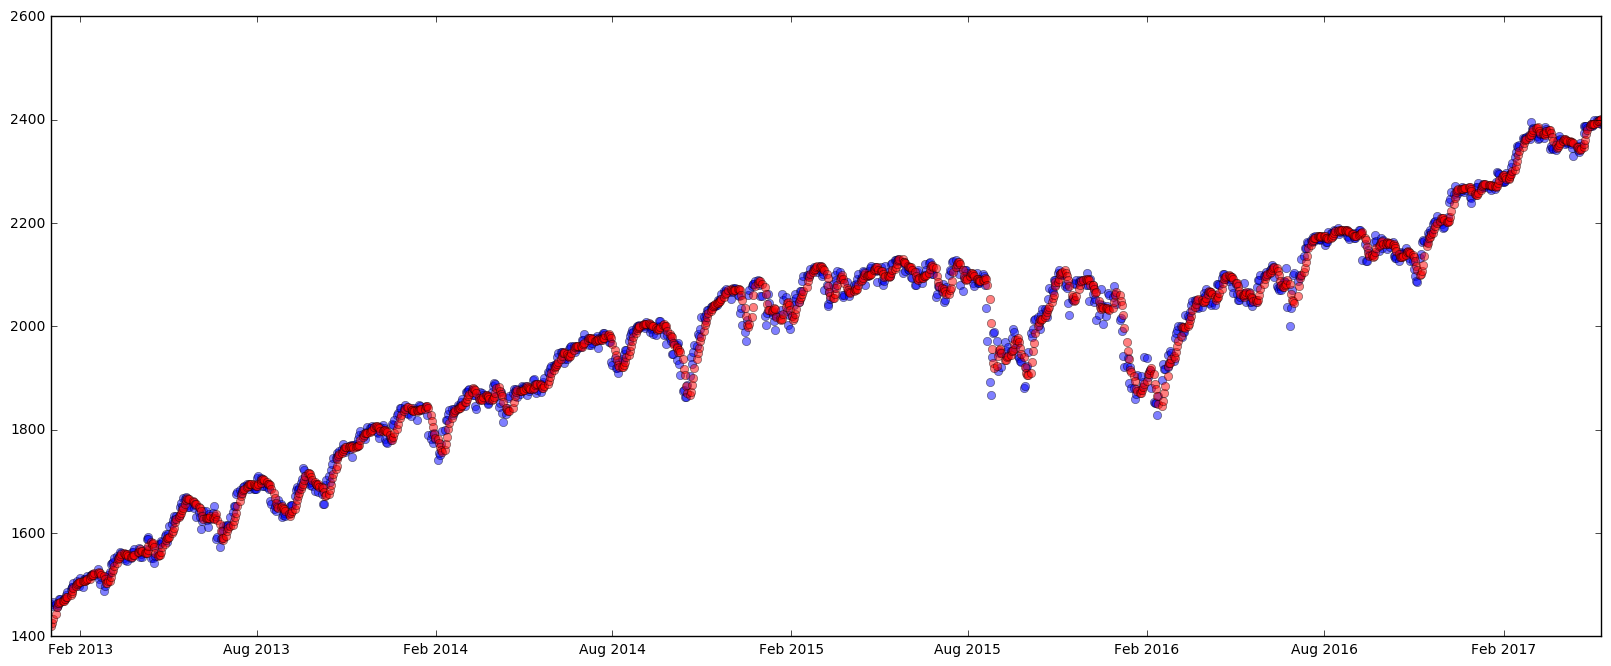

In [63]:
%matplotlib inline
import matplotlib .pyplot as plt
fig = plt.figure(figsize=(20, 8))
plt.plot_date(test["Date" ], test["Close"], color='blue', alpha=0.5)
plt.plot_date(test["Date"], prediction, color='red', alpha=0.5)
plt.show()

### 6: Improving Error
Congratulations! You can now predict the S&P500 (with some error). You can improve the error of this model significantly, though. Think about some indicators that might be helpful to compute.

Here are some ideas that might be helpful:

* The average volume over the past five days.
* The average volume over the past year.
* The ratio between the average volume for the past five days, and the average volume for the past year.
* The standard deviation of the average volume over the past five days.
* The standard deviation of the average volume over the past year.
* The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
* The year component of the date.
* The ratio between the lowest price in the past year and the current price.
* The ratio between the highest price in the past year and the current price.
* The year component of the date.
* The month component of the date.
* The day of week.
* The day component of the date.
* The number of holidays in the prior month.



* Add 2 additional indicators to your dataframe, and see if the error is reduced. You'll need to insert these indicators at the same point where you insert the others, before you clean out rows with NaN values and split the dataframe into train and `test.

### 7: Next Steps
There's a lot of improvement still to be made on the indicator side, and we urge you to think of better indicators that you could use for prediction.

We can also make significant structural improvements to the algorithm, and pull in data from other sources.

Accuracy would improve greatly by making predictions only one day ahead. For example, train a model using data from 1951-01-03 to 2013-01-02, make predictions for 2013-01-03, and then train another model using data from 1951-01-03 to 2013-01-03, make predictions for 2013-01-04, and so on. This more closely simulates what you'd do if you were trading using the algorithm.

You can also improve the algorithm used significantly. Try other techniques, like a random forest, and see if they perform better.

You can also incorporate outside data, such as the weather in New York City (where most trading happens) the day before, and the amount of Twitter activity around certain stocks.

You can also make the system real-time by writing an automated script to download the latest data when the market closes, and make predictions for the next day.

Finally, you can make the system "higher-resolution". You're currently making daily predictions, but you could make hourly, minute-by-minute, or second by second predictions. This will require obtaining more data, though. You could also make predictions for individual stocks instead of the S&P500.